<a href="https://colab.research.google.com/github/binodmathews93/GUVI-DeepLearning/blob/main/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [2]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [3]:
sigmoid(2,4,1)

0.9998766054240137

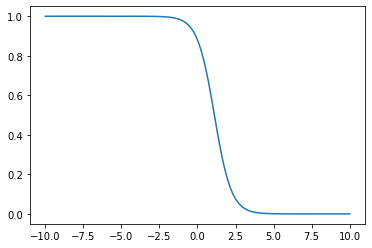

In [15]:
w = -1.8  #@param {type: "slider", min: -2, max: 2, step:0.1}
b = 2  #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace( -10, 10 , 100)
Y = sigmoid(X,w,b)

plt.plot(X,Y)
plt.show()

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

In [16]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [18]:
sigmoid_2d(2,0,4,0,1)

0.9998766054240137

In [19]:
from mpl_toolkits import mplot3d

In [56]:
X1 = np.linspace( -10, 10 , 100)
X2 = np.linspace( -10, 10 , 100)

XX1,XX2 = np.meshgrid(X1,X2)

print(X1.shape , X2.shape , XX1.shape , XX2.shape) 


(100,) (100,) (100, 100) (100, 100)


In [64]:
print(XX2)

[[-10.        -10.        -10.        ... -10.        -10.
  -10.       ]
 [ -9.7979798  -9.7979798  -9.7979798 ...  -9.7979798  -9.7979798
   -9.7979798]
 [ -9.5959596  -9.5959596  -9.5959596 ...  -9.5959596  -9.5959596
   -9.5959596]
 ...
 [  9.5959596   9.5959596   9.5959596 ...   9.5959596   9.5959596
    9.5959596]
 [  9.7979798   9.7979798   9.7979798 ...   9.7979798   9.7979798
    9.7979798]
 [ 10.         10.         10.        ...  10.         10.
   10.       ]]


In [57]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [58]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("" , ["red","yellow","green"])

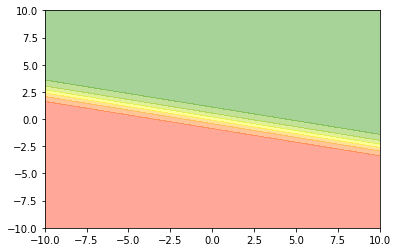

In [62]:
plt.contourf( XX1,XX2,Y,cmap=my_cmap,alpha=0.4)
plt.show()

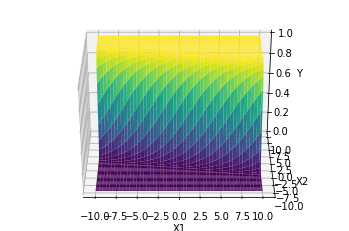

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

ax.view_init(30,270)

#Compute Loss for a given Dataset

In [32]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

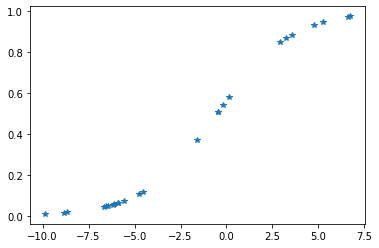

In [34]:
plt.plot(X,Y,'*')
plt.show()

In [35]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(x,w_est,b_est))**2
  return loss

In [44]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW , BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [45]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X , Y , WW[i,j] , BB[i,j])

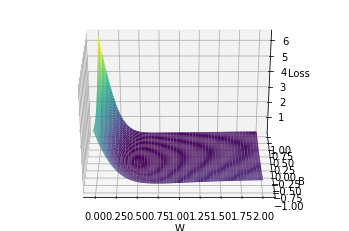

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30,270)

In [52]:
ij = np.argmin(Loss)
i = int(np.floor(ij / Loss.shape[0]))
j = int(ij - (i * Loss.shape[1]))
print(i,j)

62 25


In [54]:
print(WW[i,j],BB[i,j])

0.5050505050505051 0.2525252525252526


#Class for Sigmoid Neuron

In [65]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x,self.w) + self.b

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x ,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x ,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self , X, Y, epochs=1, lr=1, initialise=True):

    #initialize w,b
    if initialise:
      self.w = np.random.rand(1,X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= dw * lr
      self.b -= db * lr